<a href="https://colab.research.google.com/github/develop-insight/AIFFEL_quest_rs/blob/master/GoingDeeper/Go02%20/machine_learning_multi_classification_In_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다양한 알고리즘 머신러닝 분류기를 사용해 뉴스 다중분류 해보자

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import tensorflow as tf
from tensorflow.keras.datasets import reuters

print(tf.__version__)
print(mpl.__version__)
print(sns.__version__)
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

2.18.0
3.10.0
0.13.2
2.0.2
2.2.2
1.6.1


## 데이터 준비; 단어-인덱스 사전 생성;

##### word_to_index, index_to_word

In [2]:
word_to_index = reuters.get_word_index(path="reuters_word_index.json")

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [3]:
len(word_to_index)

30979

In [4]:
index_to_word = { index+3 : word for word, index in word_to_index.items() }

+3 -> `<pad>`, `<sos>`, `<unk>`

In [5]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

##### index_to_word 함수

In [6]:
# index -> word 함수
def get_word(data):
    decoded_text = []
    for i in range(len(data)):
        t = ' '.join([index_to_word[index] for index in data[i]])
        decoded_text.append(t)
    return decoded_text

##### 모든 단어 사용

In [7]:
(x_train_none, y_train_none), (x_test_none, y_test_none) = reuters.load_data(num_words=None, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


위에서 word_to_index의 크기를 확인해 num_words=None 일때의 단어 수가 30979개인 것을 알 수 있다.

In [8]:
x_train_none = get_word(x_train_none)
x_train_none[0]

'<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
x_test_none = get_word(x_test_none)
x_test_none[0]

'<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3'

##### 빈도수 상위 2,500개

In [10]:
(x_train_2500, y_train_2500), (x_test_2500, y_test_2500) = reuters.load_data(num_words=2500, test_split=0.2)

In [11]:
x_train_2500 = get_word(x_train_2500)
x_test_2500 = get_word(x_test_2500)

##### 빈도수 상위 5,000개

In [12]:
(x_train_5000, y_train_5000), (x_test_5000, y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)

In [13]:
x_train_5000 = get_word(x_train_5000)
x_test_5000 = get_word(x_test_5000)

##### 빈도수 상위 7,500개

In [14]:
(x_train_7500, y_train_7500), (x_test_7500, y_test_7500) = reuters.load_data(num_words=7500, test_split=0.2)

In [15]:
x_train_7500 = get_word(x_train_7500)
x_test_7500 = get_word(x_test_7500)

##### 빈도수 상위 10,000개

In [16]:
(x_train_10000, y_train_10000), (x_test_10000, y_test_10000) = reuters.load_data(num_words=10000, test_split=0.2)

In [17]:
x_train_10000 = get_word(x_train_10000)
x_test_10000 = get_word(x_test_10000)

##### 빈도수 상위 12,500개

In [18]:
(x_train_12500, y_train_12500), (x_test_12500, y_test_12500) = reuters.load_data(num_words=12500, test_split=0.2)

In [19]:
x_train_12500 = get_word(x_train_12500)
x_test_12500 = get_word(x_test_12500)

##### 빈도수 상위 15,000개

In [20]:
(x_train_15000, y_train_15000), (x_test_15000, y_test_15000) = reuters.load_data(num_words=15000, test_split=0.2)

In [21]:
x_train_15000 = get_word(x_train_15000)
x_test_15000 = get_word(x_test_15000)

##### 빈도수 상쉬 17,500개

In [22]:
(x_train_17500, y_train_17500), (x_test_17500, y_test_17500) = reuters.load_data(num_words=17500, test_split=0.2)

In [23]:
x_train_17500 = get_word(x_train_17500)
x_test_17500 = get_word(x_test_17500)

##### 빈도수 상위 20,000개

In [24]:
(x_train_20000, y_train_20000), (x_test_20000, y_test_20000) = reuters.load_data(num_words=20000, test_split=0.2)

In [25]:
x_train_20000 = get_word(x_train_20000)
x_test_20000 = get_word(x_test_20000)

## EDA

### 문장 길이 분포 확인

In [26]:
def analyze_text_length(x_train):
    length = [len(l.split(" ")) for l in x_train]
    print('훈련용 뉴스의 최대 길이 :{}'.format(max(length)))
    print('훈련용 뉴스의 평균 길이 :{}'.format(sum(length)/len(length)))

    plt.hist(length, bins=50)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show()

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


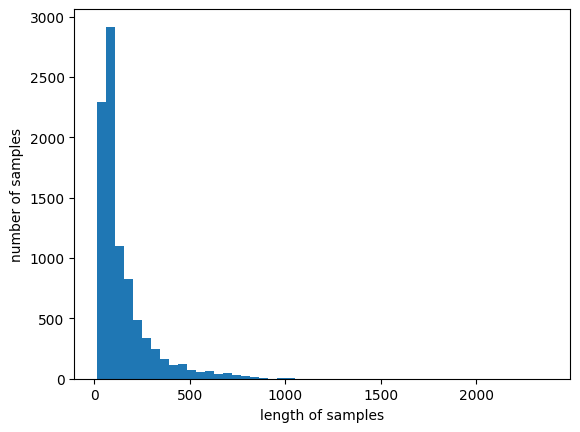

In [27]:
analyze_text_length(x_train_none)

### 클래스 빈도수 확인

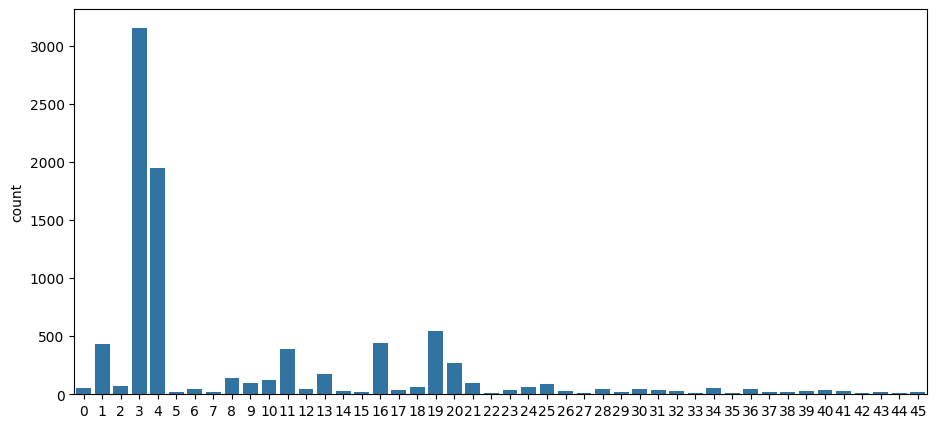

In [28]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_none)
plt.show()

In [70]:
unique_elements, counts_elements = np.unique(y_train_none, return_counts=True)
print("각 클래스 빈도수:")
# print(np.asarray((unique_elements, counts_elements)))
class_frequencies = dict(zip(unique_elements, counts_elements))
print(dict(sorted(class_frequencies.items(), key=lambda x: x[1], reverse=True)))

각 클래스 빈도수:
{np.int64(3): np.int64(3159), np.int64(4): np.int64(1949), np.int64(19): np.int64(549), np.int64(16): np.int64(444), np.int64(1): np.int64(432), np.int64(11): np.int64(390), np.int64(20): np.int64(269), np.int64(13): np.int64(172), np.int64(8): np.int64(139), np.int64(10): np.int64(124), np.int64(9): np.int64(101), np.int64(21): np.int64(100), np.int64(25): np.int64(92), np.int64(2): np.int64(74), np.int64(18): np.int64(66), np.int64(24): np.int64(62), np.int64(0): np.int64(55), np.int64(34): np.int64(50), np.int64(12): np.int64(49), np.int64(36): np.int64(49), np.int64(6): np.int64(48), np.int64(28): np.int64(48), np.int64(30): np.int64(45), np.int64(23): np.int64(41), np.int64(17): np.int64(39), np.int64(31): np.int64(39), np.int64(40): np.int64(36), np.int64(32): np.int64(32), np.int64(41): np.int64(30), np.int64(14): np.int64(26), np.int64(26): np.int64(24), np.int64(39): np.int64(24), np.int64(43): np.int64(21), np.int64(15): np.int64(20), np.int64(29): np.int64(19), np

3, 4 클래스가 특히 많은 것을 확인할 수 있다. => 클래스 불균형 데이터

## 벡터화

##### 에러 기록

[공식문서: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)  
사용방법

```python
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)
```

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidfv_none = tfidf_transformer.fit_transform(x_train_none)

ValueError: Expected 2D array, got 1D array instead:
array=['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3"
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are calculated after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in enron corp of 14 mln dlrs and associated companies of 4 189 000 less writedowns of investments in national intergroup inc of 11 8 mln and brae corp of 15 6 mln reuter 3'
 ...
 "<sos> international phoenix energy corp said it launched a gold recovery venture with lt phoenix exploration and recovery inc and mexico's sistemas tecnicos de recuperaciones sociedad anonima de capital variable the company said the joint venture will explore and recover gold precious metals and artefacts from treasure ships worth 10 billion dlrs reported to have sunk in the harbor area of vera cruz mexico the company said it expects work to begin in 30 days reuter 3"
 "<sos> shr loss 76 cts vs profit 50 cts net loss 19 186 000 vs profit 12 438 000 sales 157 9 mln vs 149 2 mln note fiscal 1987 net loss includes a pretax charge of 19 5 mln dlrs from restructuring and an after tax charge of about seven mln dlrs from debt prepayment premiums fiscal 1986 net profit includes a pretax gain of 7 2 mln dlrs on the sale of some land an after tax loss 1 35 mln dlrs from discontinued operations and an after tax gain of 6 7 mln dlrs from a change in accounting all results restated to exclude five businesses divested as part of the company's restructuring program reuter 3"
 "<sos> currency fluctuations may reassert their influence on the bullion market in the near future bullion bankers samuel montagu and co ltd said in a market report but the firm said silver may lag behind gold in any reactions to movements on foreign exchanges opec's failure to address the recent decline in oil prices remains a worrying factor however and on balance it appears that the market should be approached cautiously montagu said the bank said the us economy has shown no noticeable long term improvement and that both latin american debt and the iranian arms affair could undermine confidence in the dollar reuter 3"].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

=> 2d-array가 필요하다는 에러  
원인을 찾지 못함

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [30]:
def myVectorizer(x_train, x_test):
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)

    tfidf_transformer = TfidfTransformer()
    tfidfv_train = tfidf_transformer.fit_transform(x_train_dtm)

    x_test_dim = dtmvector.transform(x_test)
    tfidfv_test = tfidf_transformer.transform(x_test_dim)

    return tfidfv_train, tfidfv_test

In [31]:
tfidfv_train_none, tfidfv_test_none = myVectorizer(x_train_none, x_test_none)

In [32]:
tfidfv_train_2500, tfidfv_test_2500 = myVectorizer(x_train_2500, x_test_2500)
tfidfv_train_5000, tfidfv_test_5000 = myVectorizer(x_train_5000, x_test_5000)
tfidfv_train_7500, tfidfv_test_7500 = myVectorizer(x_train_7500, x_test_7500)
tfidfv_train_10000, tfidfv_test_10000 = myVectorizer(x_train_10000, x_test_10000)
tfidfv_train_12500, tfidfv_test_12500 = myVectorizer(x_train_12500, x_test_12500)
tfidfv_train_15000, tfidfv_test_15000 = myVectorizer(x_train_15000, x_test_15000)
tfidfv_train_17500, tfidfv_test_17500 = myVectorizer(x_train_17500, x_test_17500)
tfidfv_train_20000, tfidfv_test_20000 = myVectorizer(x_train_20000, x_test_20000)

In [33]:
data_set_list = [
    (tfidfv_train_2500, y_train_2500, tfidfv_test_2500,y_test_2500),
    (tfidfv_train_5000, y_train_5000, tfidfv_test_5000,y_test_5000),
    (tfidfv_train_7500, y_train_7500, tfidfv_test_7500,y_test_7500),
    (tfidfv_train_10000, y_train_10000, tfidfv_test_10000,y_test_10000),
    (tfidfv_train_12500, y_train_12500, tfidfv_test_12500,y_test_12500),
    (tfidfv_train_15000, y_train_15000, tfidfv_test_15000,y_test_15000),
    (tfidfv_train_17500, y_train_17500, tfidfv_test_17500,y_test_17500),
    (tfidfv_train_20000, y_train_20000, tfidfv_test_20000,y_test_20000),
    (tfidfv_train_none, y_train_none, tfidfv_test_none,y_test_none)
]

## 모델

In [34]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [35]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

In [36]:
nb = MultinomialNB()
cnb = ComplementNB()
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
svc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
rf = RandomForestClassifier(n_estimators=5, random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
voting_classifier =  VotingClassifier(estimators=[("lr",LogisticRegression(C=10000, penalty='l2', max_iter=3000))
                                                  ,("cNB",ComplementNB())
                                                  ,("gboost",GradientBoostingClassifier(random_state=0))]
                                      ,voting='soft')

In [37]:
import warnings
warnings.filterwarnings('ignore')

svc_accuracy_list = []
svc_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    svc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
    svc.fit(tfidfv_train,y_train)

    predicted = svc.predict(tfidfv_test)
    print("정확도: ",accuracy_score(y_test,predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    svc_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test,predicted)})
    svc_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 2430)
정확도:  0.7497773820124666
f1 score[weighted] 0.746691900448376
(8982, 4867)
정확도:  0.7751558325912734
f1 score[weighted] 0.7704028403082442
(8982, 7296)
정확도:  0.784060552092609
f1 score[weighted] 0.7797082415982988
(8982, 9670)
정확도:  0.7827248441674087
f1 score[weighted] 0.7786643432841757
(8982, 11990)
정확도:  0.7889581478183437
f1 score[weighted] 0.7849954122338672
(8982, 14227)
정확도:  0.7898486197684773
f1 score[weighted] 0.7861520514032614
(8982, 16360)
정확도:  0.7827248441674087
f1 score[weighted] 0.7790746593574487
(8982, 18479)
정확도:  0.7876224398931434
f1 score[weighted] 0.7828404191662964
(8982, 26506)
정확도:  0.7889581478183437
f1 score[weighted] 0.7836120618461221


In [38]:
gboost_accuracy_list = []
gboost_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    gboost = GradientBoostingClassifier(random_state=0)
    gboost.fit(tfidfv_train, y_train)

    predicted = gboost.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    gboost_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    gboost_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 2430)
정확도:  0.7622439893143366
f1 score[weighted] 0.7591373965597551
(8982, 4867)
정확도:  0.7666963490650045
f1 score[weighted] 0.7649877687417499
(8982, 7296)
정확도:  0.7702582368655387
f1 score[weighted] 0.766675654623051
(8982, 9670)
정확도:  0.7684772929652716
f1 score[weighted] 0.7648414063478852
(8982, 11990)
정확도:  0.7693677649154052
f1 score[weighted] 0.7656734736887528
(8982, 14227)
정확도:  0.7684772929652716
f1 score[weighted] 0.765869676625823
(8982, 16360)
정확도:  0.7666963490650045
f1 score[weighted] 0.7644111458577195
(8982, 18479)
정확도:  0.7707034728406055
f1 score[weighted] 0.7650113111028608
(8982, 26506)
정확도:  0.7680320569902048
f1 score[weighted] 0.7627039195788207


In [39]:
dtree_accuracy_list = []
dtree_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
    dtree.fit(tfidfv_train, y_train)

    predicted = dtree.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    dtree_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    dtree_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})


(8982, 2430)
정확도:  0.6260017809439002
f1 score[weighted] 0.5793740833103838
(8982, 4867)
정확도:  0.6179875333926982
f1 score[weighted] 0.5729970881280324
(8982, 7296)
정확도:  0.6202137132680321
f1 score[weighted] 0.573125812064457
(8982, 9670)
정확도:  0.6202137132680321
f1 score[weighted] 0.5776398779280149
(8982, 11990)
정확도:  0.6206589492430988
f1 score[weighted] 0.5737682162385347
(8982, 14227)
정확도:  0.6193232413178985
f1 score[weighted] 0.5755585664009136
(8982, 16360)
정확도:  0.6197684772929652
f1 score[weighted] 0.5735698647799298
(8982, 18479)
정확도:  0.6211041852181657
f1 score[weighted] 0.576123209915252
(8982, 26506)
정확도:  0.6211041852181657
f1 score[weighted] 0.5769283128518847


In [40]:
cnb_accuracy_list = []
cnb_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    cnb = ComplementNB()
    cnb.fit(tfidfv_train, y_train)

    predicted = cnb.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    cnb_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    cnb_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 2430)
정확도:  0.7609082813891362
f1 score[weighted] 0.7332431109256139
(8982, 4867)
정확도:  0.7707034728406055
f1 score[weighted] 0.7458990404916549
(8982, 7296)
정확도:  0.7693677649154052
f1 score[weighted] 0.7454248415675131
(8982, 9670)
정확도:  0.7707034728406055
f1 score[weighted] 0.7456682614453047
(8982, 11990)
정확도:  0.7733748886910062
f1 score[weighted] 0.7478467240937832
(8982, 14227)
정확도:  0.7720391807658059
f1 score[weighted] 0.7448186439256784
(8982, 16360)
정확도:  0.7707034728406055
f1 score[weighted] 0.74346916254542
(8982, 18479)
정확도:  0.7671415850400712
f1 score[weighted] 0.7390612170450325
(8982, 26506)
정확도:  0.7649154051647373
f1 score[weighted] 0.7346534179503126


In [41]:
lr_accuracy_list = []
lr_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
    lr.fit(tfidfv_train, y_train)

    predicted = lr.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    lr_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    lr_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 2430)
정확도:  0.7831700801424755
f1 score[weighted] 0.776847499349162
(8982, 4867)
정확도:  0.8058771148708815
f1 score[weighted] 0.7999522035295096
(8982, 7296)
정확도:  0.8067675868210151
f1 score[weighted] 0.8005290410011431
(8982, 9670)
정확도:  0.8085485307212823
f1 score[weighted] 0.8022767333513924
(8982, 11990)
정확도:  0.808993766696349
f1 score[weighted] 0.8025165123233289
(8982, 14227)
정확도:  0.8116651825467498
f1 score[weighted] 0.8053235531647143
(8982, 16360)
정확도:  0.8138913624220837
f1 score[weighted] 0.807437012462209
(8982, 18479)
정확도:  0.8121104185218165
f1 score[weighted] 0.8064613578121923
(8982, 26506)
정확도:  0.811219946571683
f1 score[weighted] 0.805548394682704


In [43]:
rf_accuracy_list = []
rf_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    rf = RandomForestClassifier(n_estimators=5, random_state=0)
    rf.fit(tfidfv_train, y_train)

    predicted = rf.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    rf_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    rf_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 2430)
정확도:  0.705253784505788
f1 score[weighted] 0.6816910329790442
(8982, 4867)
정확도:  0.701246660730187
f1 score[weighted] 0.6770217603524399
(8982, 7296)
정확도:  0.6878895814781835
f1 score[weighted] 0.6624867512257114
(8982, 9670)
정확도:  0.674087266251113
f1 score[weighted] 0.6429484177284822
(8982, 11990)
정확도:  0.6812110418521816
f1 score[weighted] 0.65409086545212
(8982, 14227)
정확도:  0.6714158504007124
f1 score[weighted] 0.6406930098492383
(8982, 16360)
정확도:  0.678539626001781
f1 score[weighted] 0.6525177719994363
(8982, 18479)
정확도:  0.6714158504007124
f1 score[weighted] 0.6408515630206084
(8982, 26506)
정확도:  0.6544968833481746
f1 score[weighted] 0.6225909375608356


In [44]:
nb_accuracy_list = []
nb_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    nb = MultinomialNB()
    nb.fit(tfidfv_train, y_train)

    predicted = nb.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    nb_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    nb_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 2430)
정확도:  0.6905609973285841
f1 score[weighted] 0.6356933283152083
(8982, 4867)
정확도:  0.6731967943009796
f1 score[weighted] 0.6012501291711391
(8982, 7296)
정확도:  0.6642920747996438
f1 score[weighted] 0.5858743040546298
(8982, 9670)
정확도:  0.6567230632235085
f1 score[weighted] 0.5764467518778252
(8982, 11990)
정확도:  0.6455921638468388
f1 score[weighted] 0.5631782647547481
(8982, 14227)
정확도:  0.6331255565449688
f1 score[weighted] 0.5498212868794677
(8982, 16360)
정확도:  0.6242208370436332
f1 score[weighted] 0.5384873523746346
(8982, 18479)
정확도:  0.6193232413178985
f1 score[weighted] 0.531518108804116
(8982, 26506)
정확도:  0.5997328584149599
f1 score[weighted] 0.5045670886188424


In [46]:
voting_lr_svm_rf_accuracy_list = []
voting_lr_svm_rf_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    voting_lr_svm_rf = VotingClassifier(
        estimators=[("lr",LogisticRegression(C=10000, penalty='l2', max_iter=3000)),
                    ("svm",LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)),
                    ("rf",RandomForestClassifier(n_estimators=5, random_state=0))
        ],
        voting='hard')
    voting_lr_svm_rf.fit(tfidfv_train, y_train)

    predicted = voting_lr_svm_rf.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    voting_lr_svm_rf_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    voting_lr_svm_rf_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})


(8982, 2430)
정확도:  0.7782724844167409
f1 score[weighted] 0.7687603827481765
(8982, 4867)
정확도:  0.7991985752448798
f1 score[weighted] 0.7902395764132076
(8982, 7296)
정확도:  0.796527159394479
f1 score[weighted] 0.7868376122983322
(8982, 9670)
정확도:  0.8018699910952805
f1 score[weighted] 0.7909935871189485
(8982, 11990)
정확도:  0.8023152270703473
f1 score[weighted] 0.7933380206394294
(8982, 14227)
정확도:  0.7996438112199465
f1 score[weighted] 0.790726834859054
(8982, 16360)
정확도:  0.8000890471950134
f1 score[weighted] 0.7908803989396131
(8982, 18479)
정확도:  0.796527159394479
f1 score[weighted] 0.7877258985377384
(8982, 26506)
정확도:  0.8014247551202137
f1 score[weighted] 0.7924924752294835


In [47]:
voting_lr_svm_cnb_accuracy_list = []
voting_lr_svm_cnb_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    voting_lr_svm_cnb = VotingClassifier(
        estimators=[("lr",LogisticRegression(C=10000, penalty='l2', max_iter=3000)),
                    ("svm",LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)),
                    ("cnb",ComplementNB())
        ],
        voting='hard')
    voting_lr_svm_cnb.fit(tfidfv_train, y_train)

    predicted = voting_lr_svm_cnb.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    voting_lr_svm_cnb_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    voting_lr_svm_cnb_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 2430)
정확도:  0.782279608192342
f1 score[weighted] 0.7727152356930898
(8982, 4867)
정확도:  0.8032056990204809
f1 score[weighted] 0.7943676958908399
(8982, 7296)
정확도:  0.802760463045414
f1 score[weighted] 0.7930692137316244
(8982, 9670)
정확도:  0.8054318788958148
f1 score[weighted] 0.7956773195963309
(8982, 11990)
정확도:  0.807212822796082
f1 score[weighted] 0.7973390878828239
(8982, 14227)
정확도:  0.807212822796082
f1 score[weighted] 0.7969438830832221
(8982, 16360)
정확도:  0.807212822796082
f1 score[weighted] 0.7989312355365824
(8982, 18479)
정확도:  0.807212822796082
f1 score[weighted] 0.7985378254306971
(8982, 26506)
정확도:  0.804986642920748
f1 score[weighted] 0.7958012276974663


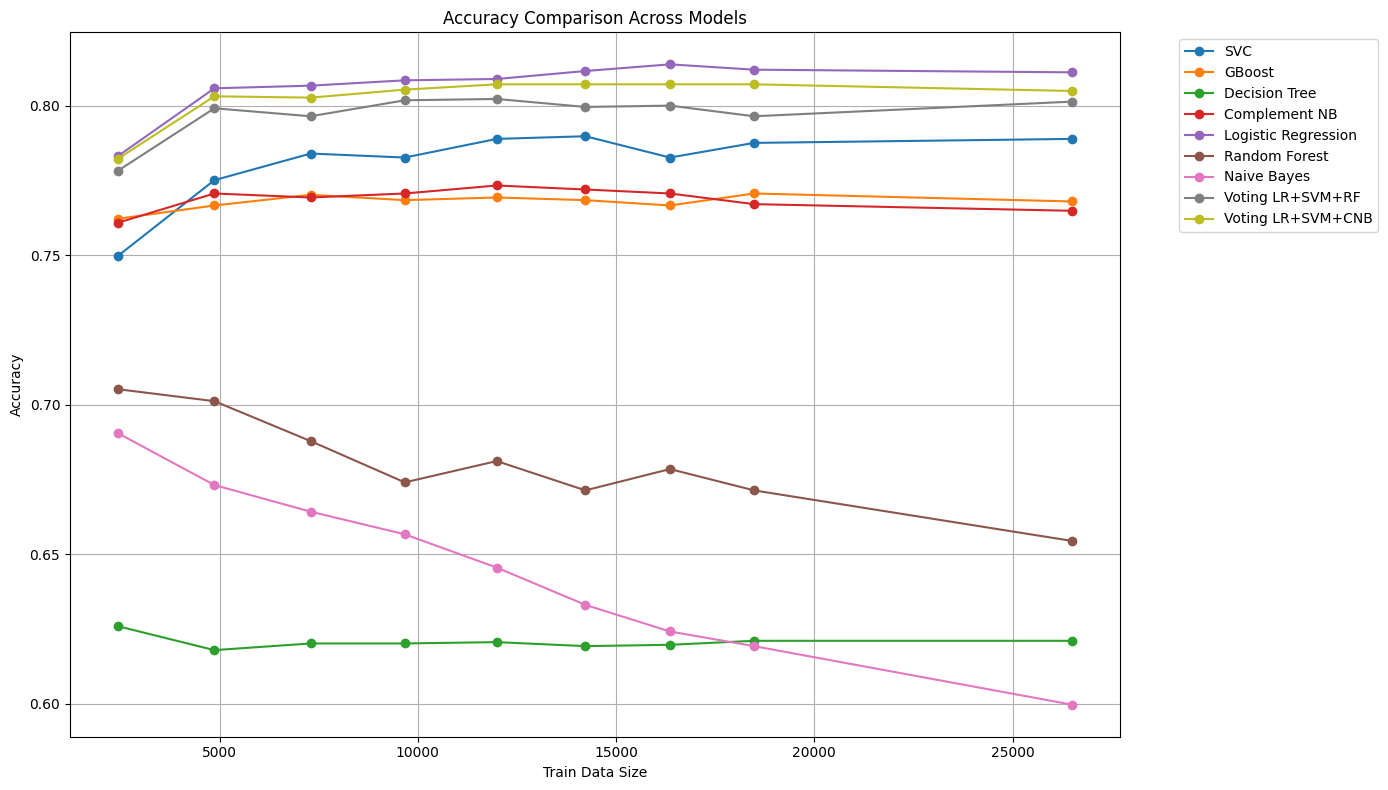

In [52]:
# 리스트를 x, y 로 나누는 함수
def extract_xy(accuracy_list):
    x = [list(d.keys())[0] for d in accuracy_list]
    y = [list(d.values())[0] for d in accuracy_list]
    return x, y

# 모델별 accuracy 리스트 (모두 채워주세요)
models = {
    "SVC": svc_accuracy_list,
    "GBoost": gboost_accuracy_list,
    "Decision Tree": dtree_accuracy_list,
    "Complement NB": cnb_accuracy_list,
    "Logistic Regression": lr_accuracy_list,
    "Random Forest": rf_accuracy_list,
    "Naive Bayes": nb_accuracy_list,
    "Voting LR+SVM+RF": voting_lr_svm_rf_accuracy_list,
    "Voting LR+SVM+CNB": voting_lr_svm_cnb_accuracy_list
}

# 그래프 크기 설정
plt.figure(figsize=(14, 8))

# 각 모델 플롯
for model_name, acc_list in models.items():
    x, y = extract_xy(acc_list)
    plt.plot(x, y, marker='o', label=model_name)

# 그래프 옵션
plt.title("Accuracy Comparison Across Models")
plt.xlabel("Train Data Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 밖으로
plt.tight_layout()
plt.show()

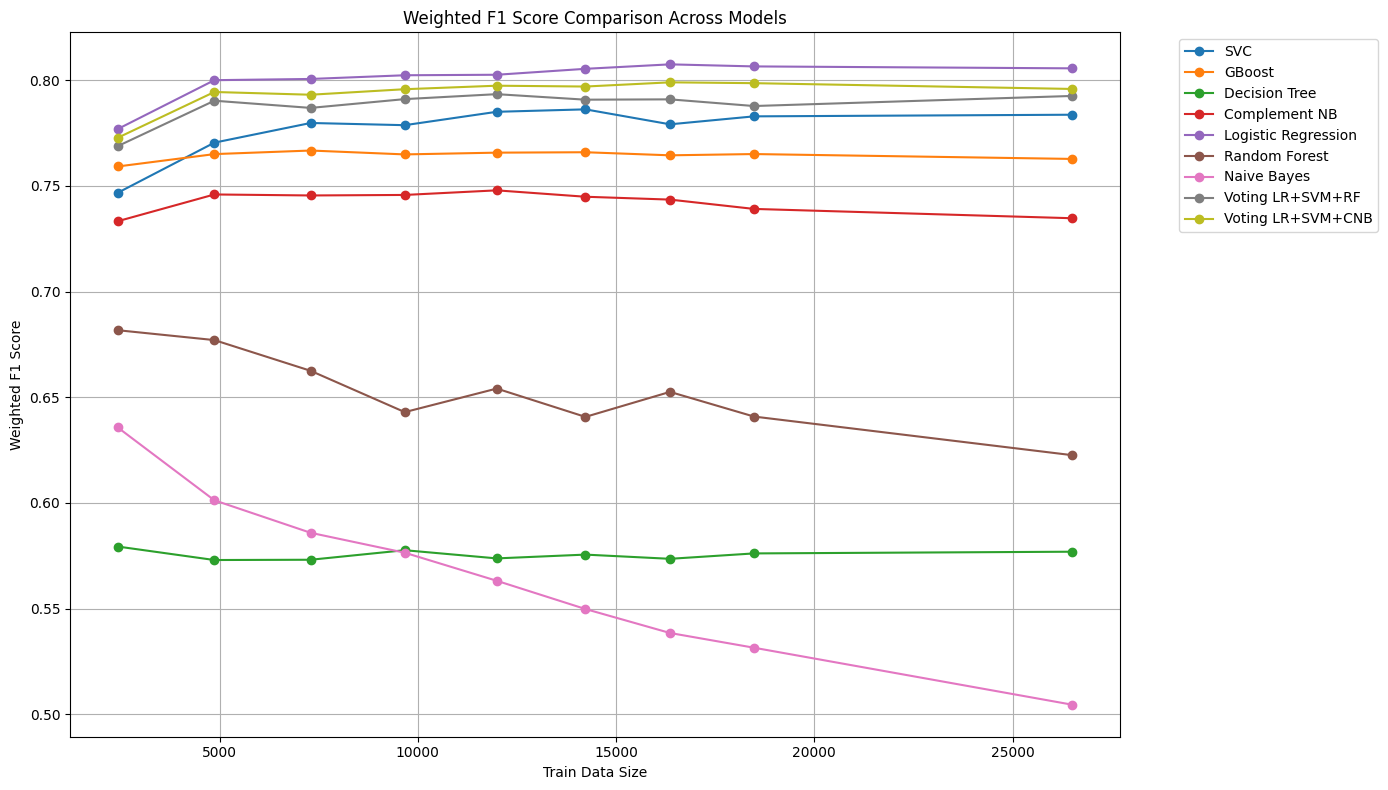

In [55]:
import matplotlib.pyplot as plt

# 리스트를 x, y 로 나누는 함수
def extract_xy(score_list):
    x = [list(d.keys())[0] for d in score_list]
    y = [list(d.values())[0] for d in score_list]
    return x, y

# 모델별 F1 Score 리스트 (여기에 실제 데이터를 넣으세요)
models_f1 = {
    "SVC": svc_f1_score_weighted_list,
    "GBoost": gboost_f1_score_weighted_list,
    "Decision Tree": dtree_f1_score_weighted_list,
    "Complement NB": cnb_f1_score_weighted_list,
    "Logistic Regression": lr_f1_score_weighted_list,
    "Random Forest": rf_f1_score_weighted_list,
    "Naive Bayes": nb_f1_score_weighted_list,
    "Voting LR+SVM+RF": voting_lr_svm_rf_f1_score_weighted_list,
    "Voting LR+SVM+CNB": voting_lr_svm_cnb_f1_score_weighted_list  # <- 오타 없음 주의
}

# 그래프 그리기
plt.figure(figsize=(14, 8))

for model_name, f1_list in models_f1.items():
    x, y = extract_xy(f1_list)
    plt.plot(x, y, marker='o', label=model_name)

# 그래프 옵션 설정
plt.title("Weighted F1 Score Comparison Across Models")
plt.xlabel("Train Data Size")
plt.ylabel("Weighted F1 Score")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례를 그래프 밖으로
plt.tight_layout()
plt.show()


## to do

- 딥러닝 모델: simple rnn, lstm, conv1d 로 비교 실험
- 각 알고리즘별 결과 리포트 쓰기
